In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Synthetic_lake_v1.0.0 - Base, inicial tests

### Codes to Run

In [ ]:
# Imports
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Data Path and creating model in Gempy
data_path = '../../input/Synthetic_Lake/'
geo_model = gp.create_model('Synthetic_Lake_Basin_V1.0.0')

# Defining extent, resolution, and surface points data.
gp.init_data(geo_model,
             extent=[0, 2000, -2000, 2000, -100, 1200],
             resolution=[150, 250, 80],
             path_i=data_path + "data_v1.0.0/surfaces_points.csv")

# Ordering series
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_Series": ('Formacao_1', 'Formacao_2', 'Formacao_3', 'Formacao_4'), 
                          "base_series": ('basement')})

# Creating orientation point for the main series (OBS: NEEDS ONE ORIENTATION PER SERIE) or you can import the data from a .csv file.
geo_model.add_orientations(X=1000, Y=500, Z=550, surface="Formacao_2", pole_vector=(0,0,1))

## To interpolate/Compute Model

In [ ]:
# Interpolating
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

# Computing
sol = gp.compute_model(geo_model, compute_mesh=True)

## To visualize the model

In [ ]:
# Can be used before/after the interpolation/computation
# Plot 2D in X, Y, and Z.
gp.plot_2d(geo_model, direction=['x'], show_data=True)
gp.plot_2d(geo_model, direction=['y'], show_data=True)
gp.plot_2d(geo_model, direction=['z'], show_data=True)

# More examples
'''gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="z", show_data=False, show_lith=True)'''

# Plot 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True)

# More examples
'''ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False)

g3d = gp.plot_3d(geo_model,
                 show_topography=True,
                 show_lith=False,
                 show_surfaces=True,
                 show_results=True)'''


## Optional codes to use

In [ ]:
'''# Check all the surface, order, colors, ids and, series
geo_model.surfaces

# Check all the surface points
geo_model.surface_points

# Check all the orientation points
geo_model.orientations

# Check the grid created
geo_model.grid

# Generate random topography
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()'''

In [2]:
data_path = '../../input/Lago_Sintetico_Testes/'
geo_model = gp.create_model('SyntheitcBasinTeste5')

In [3]:
gp.init_data(geo_model,
             extent=[0, 2000, -2000, 2000, -100, 1200],
             resolution=[150, 250, 80],
             path_i=data_path + "7_lago_sintetico_ligando_camadas/surfaces_points.csv")

Active grids: ['regular']


SyntheitcBasinTeste5  2023-04-05 15:43

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Formacao_1,Default series,1,#015482,1
1,Formacao_2,Default series,2,#9f0052,2
2,Formacao_3,Default series,3,#ffbe00,3
3,Formacao_4,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [5]:
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_Series": ('Formacao_1', 'Formacao_2', 'Formacao_3', 'Formacao_4'), 
                          "base_series": ('basement')})

,surface,series,order_surfaces,color,id
0,Formacao_1,Strat_Series,1,#015482,1
1,Formacao_2,Strat_Series,2,#9f0052,2
2,Formacao_3,Strat_Series,3,#ffbe00,3
3,Formacao_4,Strat_Series,4,#728f02,4
4,basement,base_series,1,#443988,5


In [6]:
geo_model.surface_points

,X,Y,Z,smooth,surface
0,100,500,1000,0.000002,Formacao_1
1,400,500,800,0.000002,Formacao_1
2,600,500,800,0.000002,Formacao_1
3,1000,500,650,0.000002,Formacao_1
4,1400,500,800,0.000002,Formacao_1
5,1600,500,800,0.000002,Formacao_1
6,1900,500,1000,0.000002,Formacao_1
28,100,-500,1000,0.000002,Formacao_1
29,400,-500,800,0.000002,Formacao_1
30,600,-500,800,0.000002,Formacao_1


In [7]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface


In [8]:
geo_model.add_orientations(X=1000, Y=500, Z=550, surface="Formacao_2", pole_vector=(0,0,1))

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,1000.0,500.0,550.0,0.0,0.0,1.0,0.01,Formacao_2


In [9]:
geo_model.grid

Grid Object. Values: 
array([[    6.66666667, -1992.        ,   -91.875     ],
       [    6.66666667, -1992.        ,   -75.625     ],
       [    6.66666667, -1992.        ,   -59.375     ],
       ...,
       [ 1993.33333333,  1992.        ,  1159.375     ],
       [ 1993.33333333,  1992.        ,  1175.625     ],
       [ 1993.33333333,  1992.        ,  1191.875     ]])

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


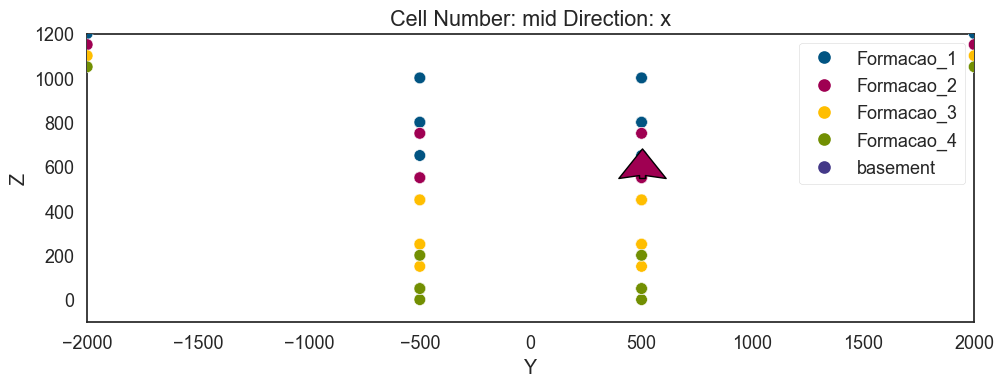

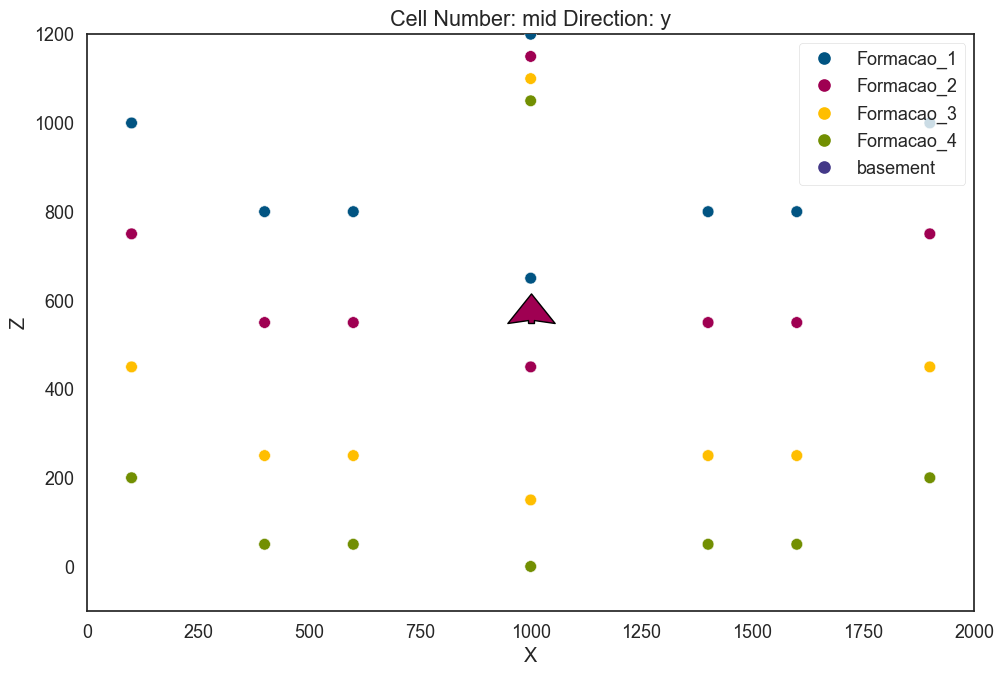

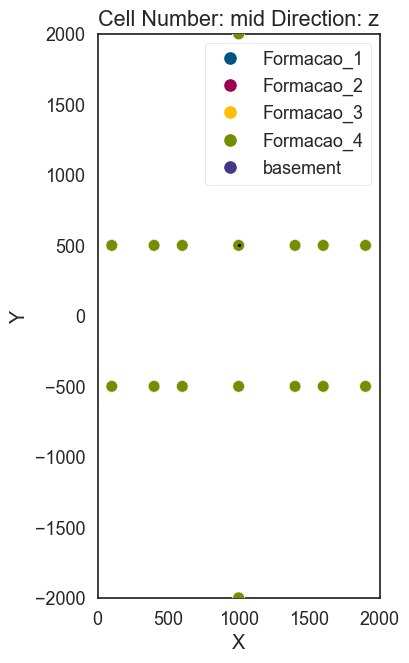

In [10]:
# Ver em 2D os dados nas 3 direções
gp.plot_2d(geo_model, direction=['x'], show_data=True)

gp.plot_2d(geo_model, direction=['y'], show_data=True)

gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [11]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True)

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


[ 940. 1200.]
Active grids: ['regular' 'topography']


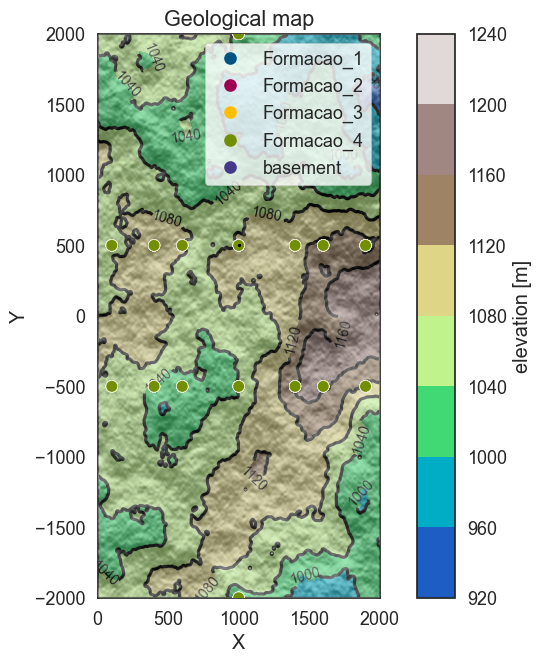

In [12]:
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()

In [13]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              4657.252409
$C_o$            516428.571429
drift equations         [3, 3]


In [14]:
%%time
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 29.3 s


c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


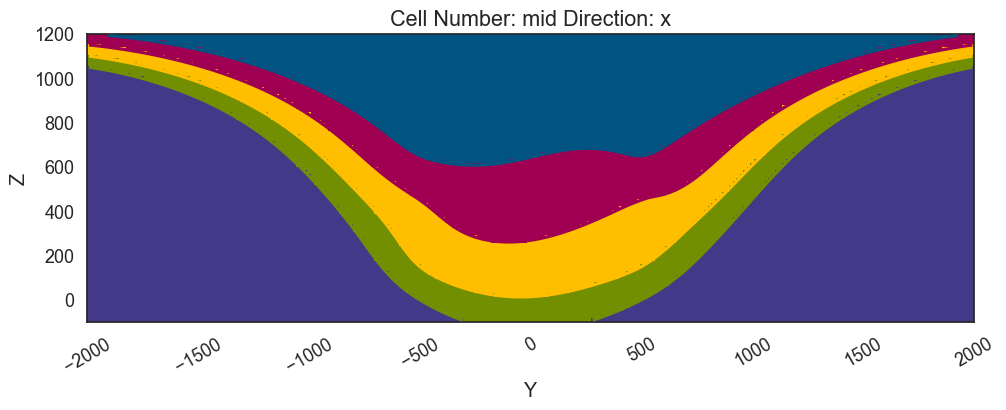

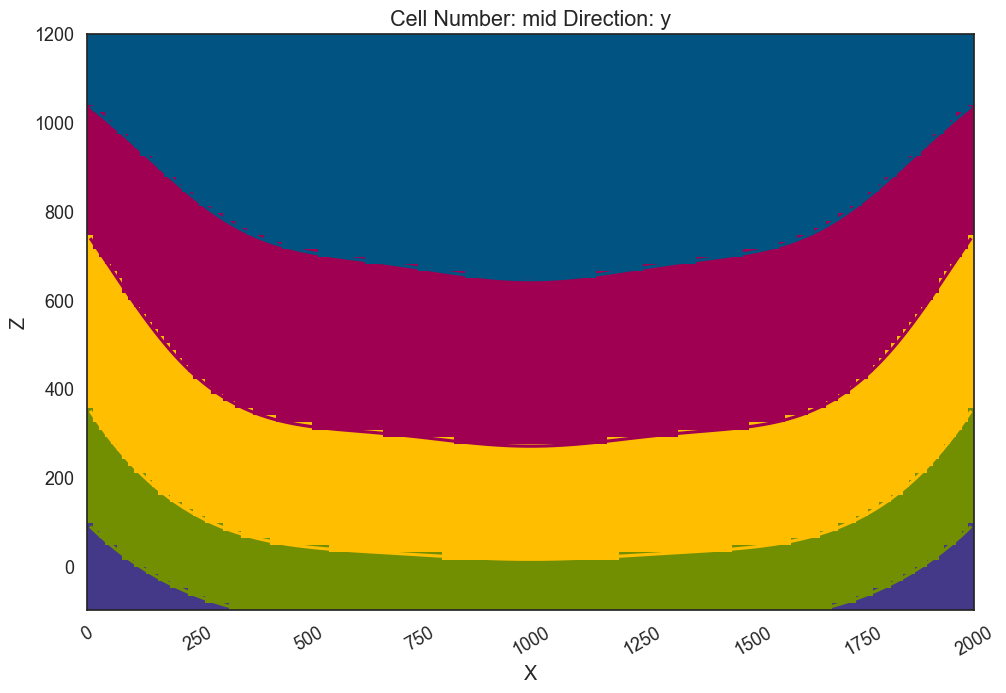

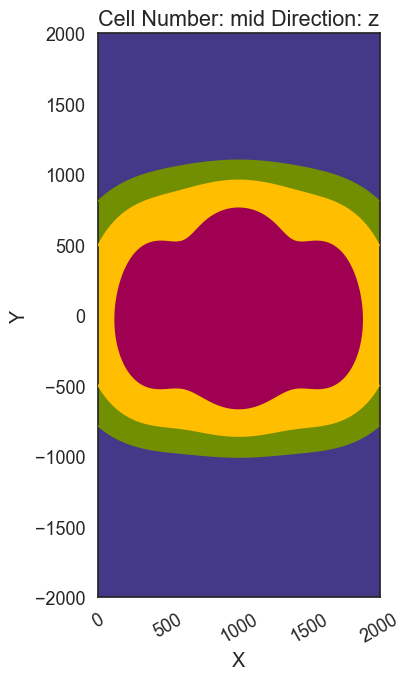

In [15]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="z", show_data=False, show_lith=True)

In [18]:
# Visualizar o modelo em 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False)

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\plotting\tools.py:624: PyVistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  PyVistaDeprecationWarning,


In [19]:
g3d = gp.plot_3d(geo_model,
                 show_topography=True,
                 show_lith=False,
                 show_surfaces=True,
                 show_results=True)

c:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '
